In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


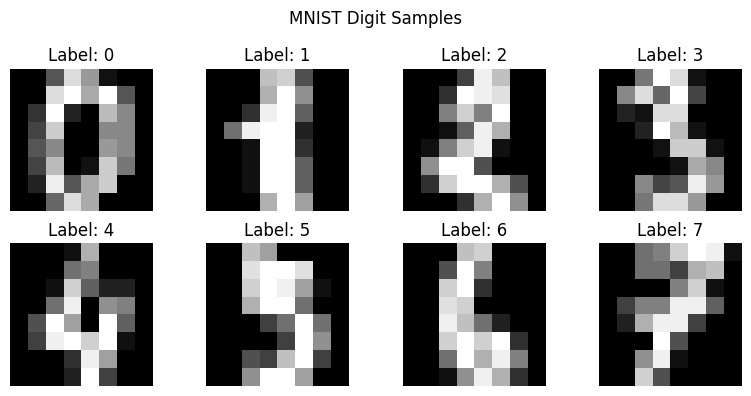

In [2]:
digits = load_digits()
X = digits.data
y = digits.target

# Show first few digits
plt.figure(figsize=(8, 4))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.axis('off')
plt.suptitle("MNIST Digit Samples")
plt.tight_layout()
plt.show()


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear')  # Can try 'rbf' or 'poly' later
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.98      0.98      0.98        50
           2       0.98      1.00      0.99        47
           3       1.00      0.96      0.98        54
           4       0.98      0.98      0.98        60
           5       0.97      0.97      0.97        66
           6       1.00      1.00      1.00        53
           7       0.96      0.98      0.97        55
           8       0.95      0.98      0.97        43
           9       0.97      0.95      0.96        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



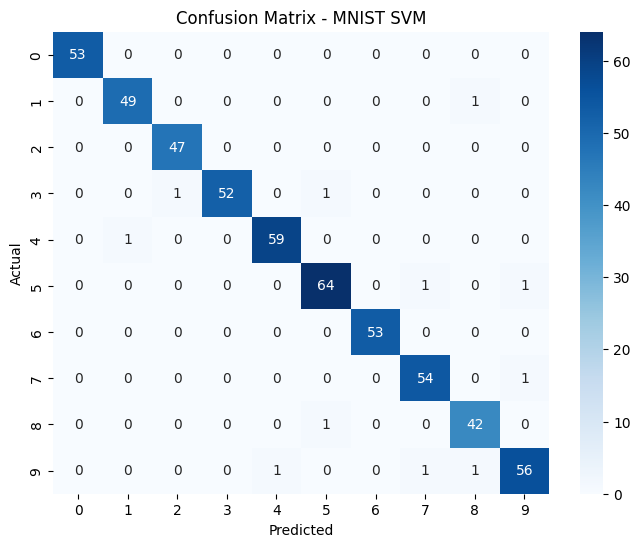

In [4]:
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix - MNIST SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Predicted Digit: 5


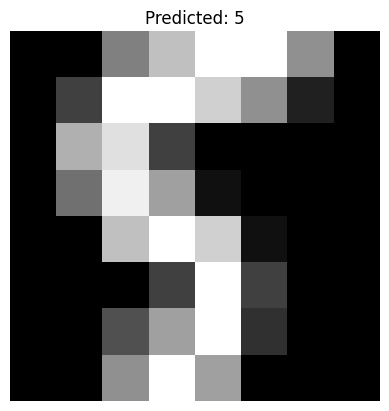

In [5]:
import numpy as np

sample_index = np.where(y_test == 5)[0][0]  # pick an actual '5'
sample = X_test[sample_index].reshape(1, -1)
pred = svm.predict(sample)

print(f"Predicted Digit: {pred[0]}")
plt.imshow(sample.reshape(8, 8), cmap='gray')
plt.title(f"Predicted: {pred[0]}")
plt.axis('off')
plt.show()
